# Computer Vision Thresholding

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

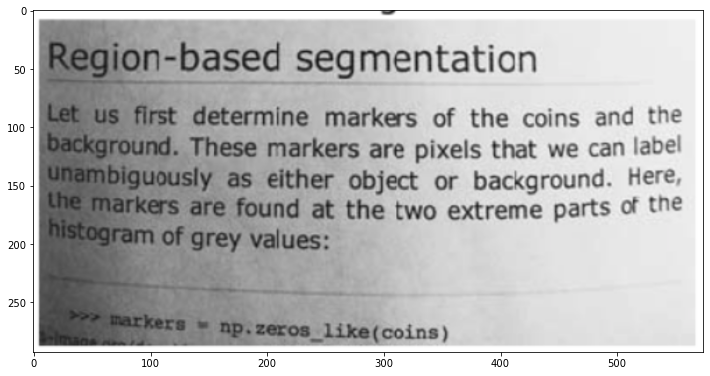

In [2]:
# Have a look at the 2 images below
text = cv2.imread('img/t1.png')
plt.figure(figsize = (12,10))
plt.imshow(text, cmap='gray')


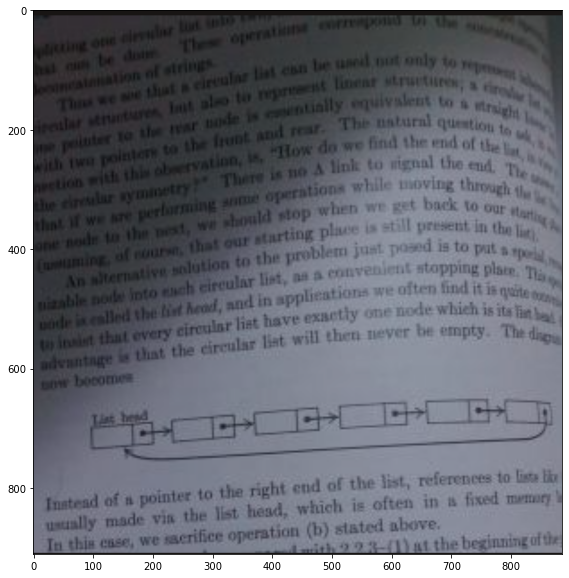

In [3]:
text_2 = cv2.imread('img/t2.png')
plt.figure(figsize = (12,10))
plt.imshow(text_2, cmap='gray')


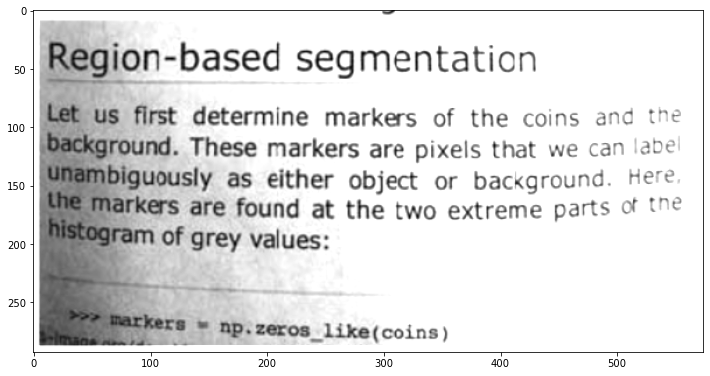

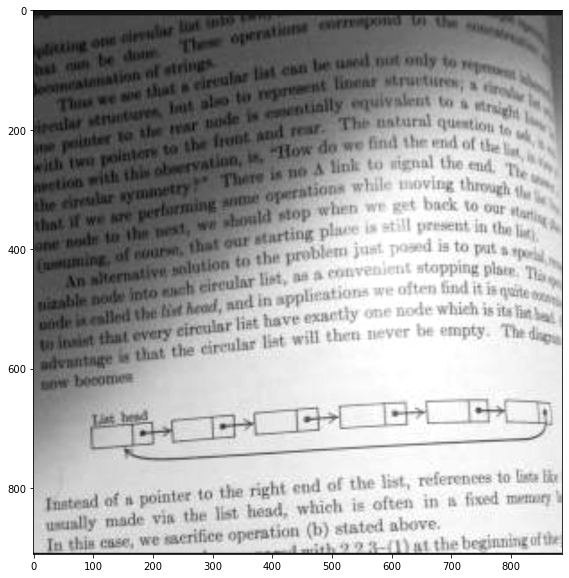

In [4]:
# Apply threshold to the images above to make them look better, try to find the best one
text_copy_1 = cv2.cvtColor(text, cv2.COLOR_BGR2GRAY)
text_copy_2 = cv2.cvtColor(text_2, cv2.COLOR_BGR2GRAY)


ret1, thresh_1 = cv2.threshold(text_copy_1, 170, 255, cv2.THRESH_TRUNC)
ret2, thresh_2 = cv2.threshold(text_copy_2, 150, 255, cv2.THRESH_TRUNC)

plt.figure(figsize = (12,10))
plt.imshow(thresh_1, cmap='gray')
plt.figure(figsize = (12,10))
plt.imshow(thresh_2, cmap='gray')

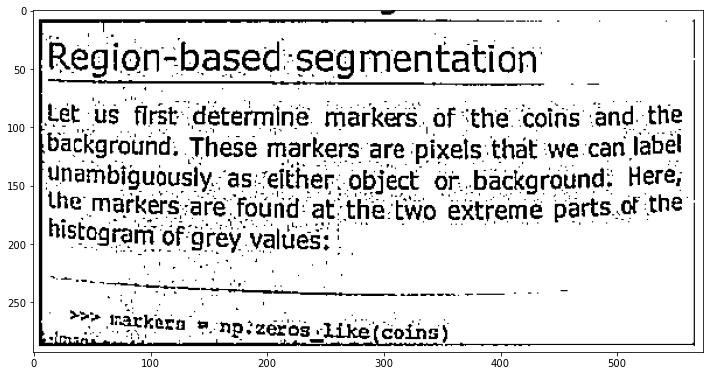

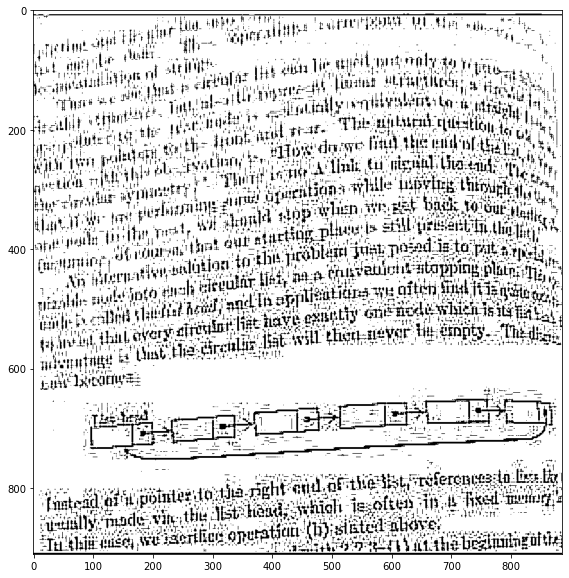

In [5]:
# Try to apply adaptiveThreshold and see if that helps, use both ADAPTIVE_THRESH_MEAN_C and ADAPTIVE_THRESH_GAUSSIAN_C
thresh_adapt_1 = cv2.adaptiveThreshold(text_copy_1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 5) #5 = blocksize / # constant
thresh_adapt_2 = cv2.adaptiveThreshold(text_copy_2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY , 7, 2) #7 = block / # 2 = C,constant

plt.figure(figsize = (12,10))
plt.imshow(thresh_adapt_1, cmap='gray')
plt.figure(figsize = (12,10))
plt.imshow(thresh_adapt_2, cmap='gray')

168.0 94.0


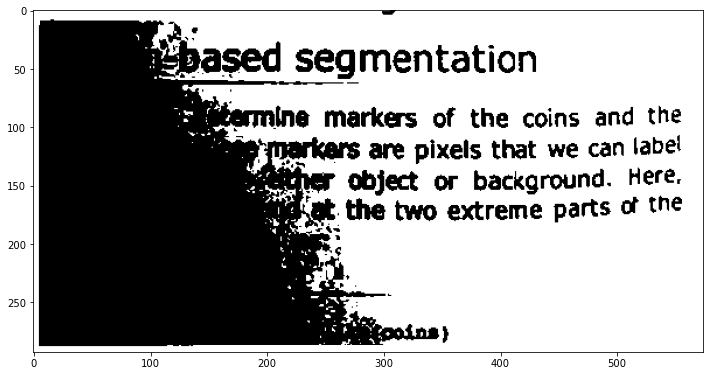

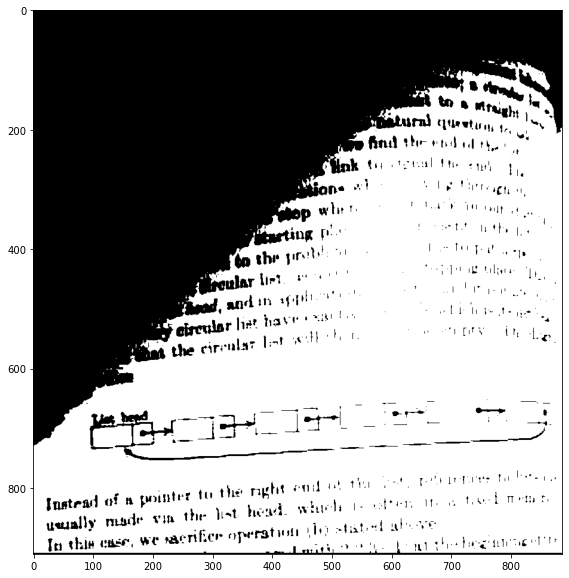

In [7]:
# Now apply Otsu's thresholding to the same images, always make sure to start with a copy of the original image
# Now apply Otsu's thresholding to the same images, always make sure to start with a copy of the original image
ret_1, thresh_otsu_1 = cv2.threshold(text_copy_1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret_2, thresh_otsu_2 = cv2.threshold(text_copy_2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


plt.figure(figsize = (12,10))
plt.imshow(thresh_otsu_1, cmap='gray')
plt.figure(figsize = (12,10))
plt.imshow(thresh_otsu_2, cmap='gray')

print(ret_1, ret_2)

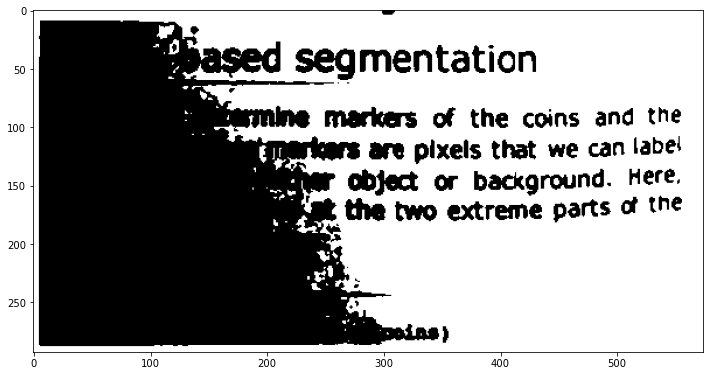

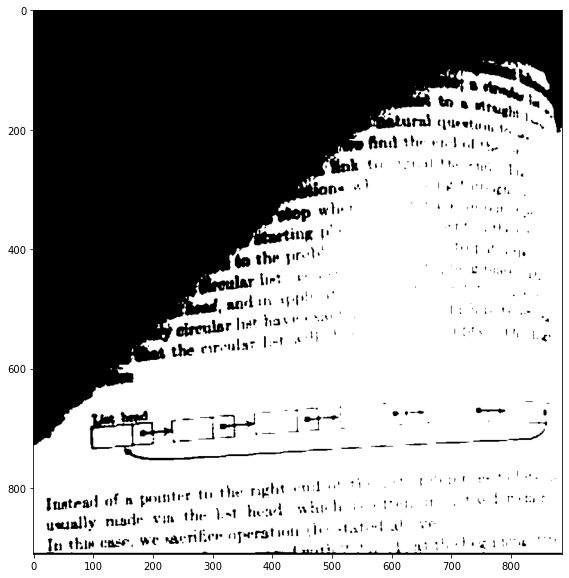

In [8]:
# Now try to first apply Gaussian Blur to the image and then Otsu thresholding
blur_1 = cv2.GaussianBlur(text_copy_1, (3, 3), 0)
blur_2 = cv2.GaussianBlur(text_copy_2, (3, 3), 0)

ret_1, thresh_otsu_1 = cv2.threshold(blur_1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret_2, thresh_otsu_2 = cv2.threshold(blur_2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


plt.figure(figsize = (12,10))
plt.imshow(thresh_otsu_1, cmap='gray')
plt.figure(figsize = (12,10))
plt.imshow(thresh_otsu_2, cmap='gray')

In [18]:
# In yesterday's notebook there was a similar challenge, with a image of a note which was very dark on the left side
# If you didn't manage to get it clean yesterday, try to go back to it now and apply what you just did here.
# Did it get better?

notes = cv2.imread('img/notes.png')
notes = cv2.cvtColor(notes, cv2.COLOR_BGR2GRAY)


In [19]:
def imshow(img):
    plt.figure(figsize=(10,7))
    plt.imshow(img, cmap='gray')
    plt.show()

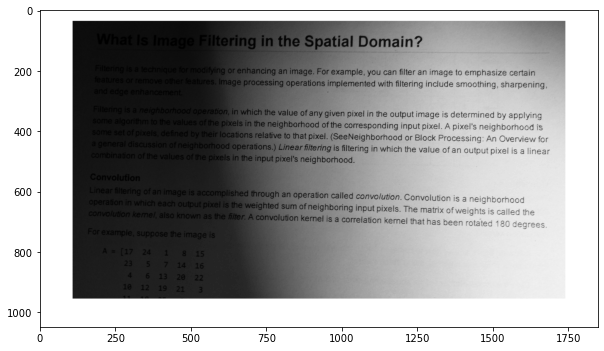

In [20]:
imshow(notes)

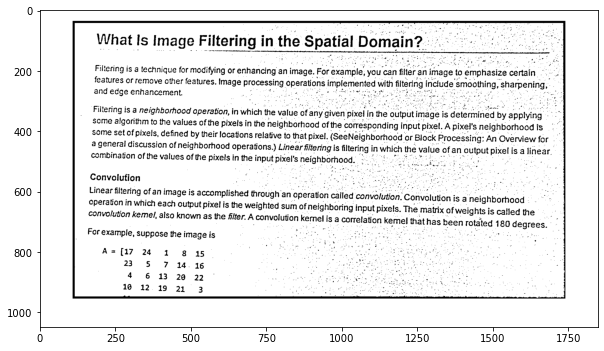

In [27]:
n_copy = notes.copy()
thresh = cv2.adaptiveThreshold(n_copy, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15,4) 
# thresh = cv2.adaptiveThreshold(thresh, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21,50)
imshow(thresh)

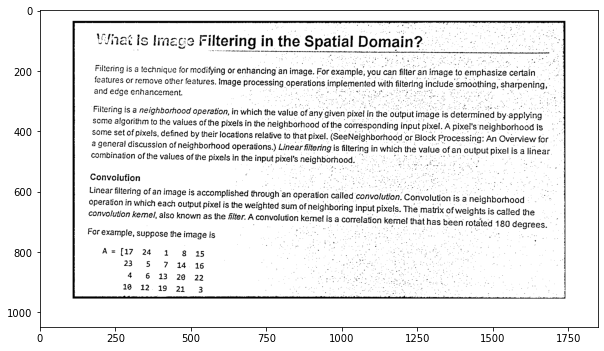

In [29]:
n_copy_2 = notes.copy()
# thresh = cv2.adaptiveThreshold(n_copy_2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21,5)
thresh = cv2.adaptiveThreshold(n_copy_2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 19,4)
imshow(thresh)

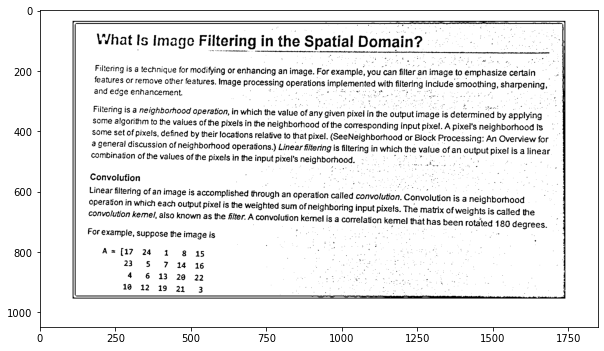

In [30]:
n_copy_3 = notes.copy()
thresh = cv2.adaptiveThreshold(n_copy_3, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21,5)
thresh = cv2.adaptiveThreshold(thresh, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21,50)
imshow(thresh)

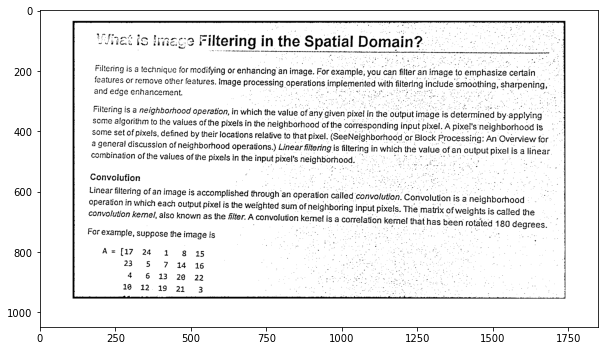

In [31]:
n_copy_bi = notes.copy()
thresh = cv2.adaptiveThreshold(n_copy_bi, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 17,4)
_, thresh = cv2.threshold(thresh, 15, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(10,7))
plt.imshow(thresh, cmap='gray')